# Лабораторная работа №8. Кластеризация

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в ваш репозиторий github в директорию ./les08
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Ирисы Фишера — набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном.

In [3]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Numpy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0


1. Импортируйте модель данных "Ирисы Фишера".

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


2. Выполните нормализацию данных

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
iris_normalized = scaler.fit_transform(iris_df)

iris_df_normalized = pd.DataFrame(data=iris_normalized, columns=iris.feature_names)
iris_df_normalized.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


3. Постройте модель кластеризации используя алгоритм  DBSCAN (https://www.youtube.com/watch?v=svAtnZ5XjSI&t=494s), подберите подходящие параметры eps, min_samples

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Стандартизация данных
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

# Кластеризация DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
clusters = dbscan.fit_predict(iris_df_scaled)

print("Метки кластеров для всех точек:")
print(clusters)
print("\nКоличество кластеров:", len(np.unique(clusters)) - (1 if -1 in clusters else 0))
print("Количество точек шума:", np.sum(clusters == -1))

Метки кластеров для всех точек:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]

Количество кластеров: 2
Количество точек шума: 4


4. Постройте диаграмму рассеяния для признаков "sepal length (cm)" "sepal width (cm)", цвет точек на диаграмме должен быть различным для разных кластеров

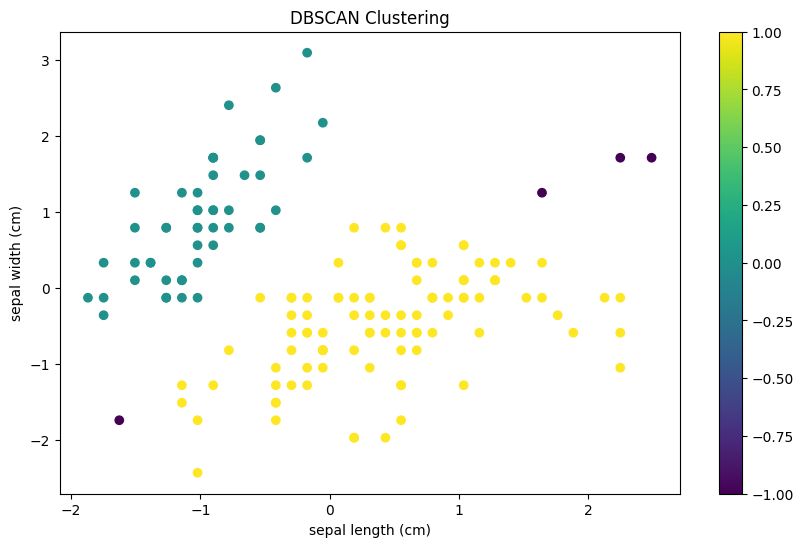

In [7]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(iris_df_scaled['sepal length (cm)'],
                     iris_df_scaled['sepal width (cm)'],
                     c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('DBSCAN Clustering')
plt.show()

5. Сделайте вывод

Вывод: В работе была проведена визуализация результатов кластеризации, что позволило наглядно увидеть распределение данных по признакам «sepal length (cm)» и «sepal width (cm)». Цветовая маркировка кластеров помогла отличить плотные группы от шумовых точек, подтвердив правильность выбора параметров DBSCAN и наглядно продемонстрировав структуру данных ирисов.

## Вопросы

1. В чем состоит задача кластеризации?
2. Для каких целей используется кластеризацияия?
3. Алгоритм кластеризации Ллойда.
4. Как выбрать количество кластеров для алгоритма K-средних
5. Алгоритм DBSCAN